### GMM Example

dataset source
https://www.kaggle.com/paytonfisher/sp-500-companies-with-financial-information

In [12]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

### Show all data frame

In [2]:
train_df = pandas.read_csv('https://raw.githubusercontent.com/scpark20/deeplearning-espresso/main/src/day2/financials.csv')
train_df = train_df[train_df['Price/Earnings'].notna() & train_df['Market Cap'].notna()]
train_df

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
0,MMM,3M Company,Industrials,222.89,24.31,2.332862,7.92,259.77,175.490,1.387211e+11,9.048000e+09,4.390271,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
1,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.147959,1.70,68.39,48.925,1.078342e+10,6.010000e+08,3.575483,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.908982,0.26,64.60,42.280,1.021210e+11,5.744000e+09,3.740480,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.499560,3.29,125.86,60.050,1.813863e+11,1.031000e+10,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ACN,Accenture plc,Information Technology,150.51,25.47,1.714470,5.44,162.60,114.820,9.876586e+10,5.643228e+09,2.604117,10.62,http://www.sec.gov/cgi-bin/browse-edgar?action...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,XYL,Xylem Inc.,Industrials,70.24,30.94,1.170079,1.83,76.81,46.860,1.291502e+10,7.220000e+08,2.726209,5.31,http://www.sec.gov/cgi-bin/browse-edgar?action...
501,YUM,Yum! Brands Inc,Consumer Discretionary,76.30,27.25,1.797080,4.07,86.93,62.850,2.700330e+10,2.289000e+09,6.313636,212.08,http://www.sec.gov/cgi-bin/browse-edgar?action...
502,ZBH,Zimmer Biomet Holdings,Health Care,115.53,14.32,0.794834,9.01,133.49,108.170,2.445470e+10,2.007400e+09,3.164895,2.39,http://www.sec.gov/cgi-bin/browse-edgar?action...
503,ZION,Zions Bancorp,Financials,50.71,17.73,1.480933,2.60,55.61,38.430,1.067068e+10,0.000000e+00,3.794579,1.42,http://www.sec.gov/cgi-bin/browse-edgar?action...


Int64Index([9], dtype='int64')

### Scaler for standardization

In [3]:
def scaler(X):
    X_mean = X.mean(axis=0, keepdims=True)
    X_std = X.std(axis=0, keepdims=True)
    X_scaled = (X - X_mean) / X_std
    
    return X_scaled, X_mean, X_std

### Plot scaled dataset

X shape : (503, 2)
X_scaled shape : (503, 2)


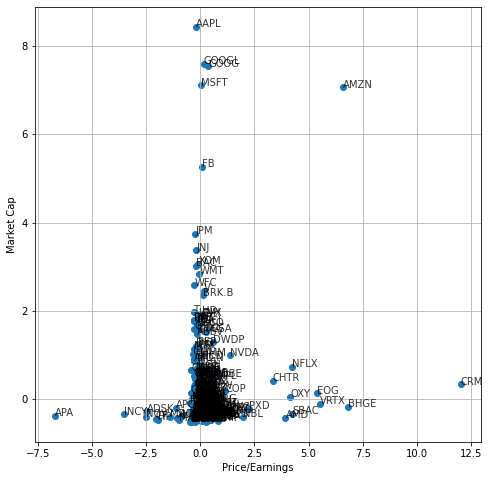

In [4]:
# 4 : Price/Earnings
# 9 : Market Cap
indexes = [4, 9]
X = train_df.values[:, indexes].astype(np.float)
print('X shape :', X.shape)

X_scaled, X_mean, X_std = scaler(X)
print('X_scaled shape :', X_scaled.shape)

plt.figure(figsize=[8, 8])
plt.scatter(X_scaled[:, 0], X_scaled[:, 1])
for i, symbol in enumerate(train_df['Symbol'].values):
    plt.annotate(symbol, (X_scaled[i, 0], X_scaled[i, 1]), alpha=0.8)
plt.grid()
plt.xlabel('Price/Earnings')
plt.ylabel('Market Cap')
plt.show()

In [5]:
# code from : https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html

from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

### Do GMM & plot clusters

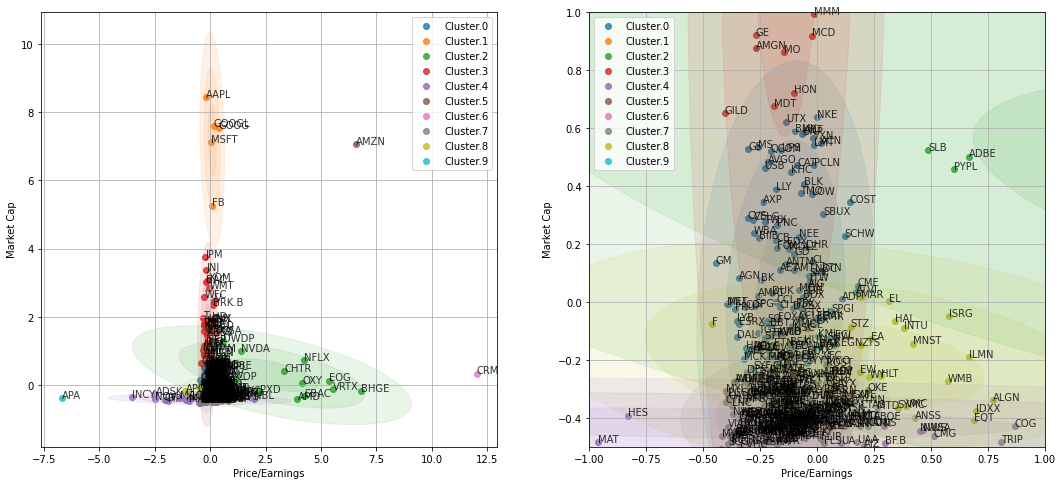

In [46]:
from sklearn.mixture import GaussianMixture
np.random.seed(815)

n_components = 10
gmm = GaussianMixture(n_components=n_components)
labels = gmm.fit_predict(X_scaled)
colors = plt.cm.tab10.colors

plt.figure(figsize=[18, 8])
plt.subplot(1, 2, 1)
for i in range(n_components):
    plt.scatter(X_scaled[labels==i, 0], X_scaled[labels==i, 1], color=colors[i], alpha=0.8, label='Cluster.'+str(i))
    draw_ellipse(gmm.means_[i], gmm.covariances_[i], color=colors[i], alpha=0.1)
for i, symbol in enumerate(train_df['Symbol'].values):
    plt.annotate(symbol, (X_scaled[i, 0], X_scaled[i, 1]), alpha=0.8)
plt.grid()
plt.legend()
plt.xlabel('Price/Earnings')
plt.ylabel('Market Cap')

plt.subplot(1, 2, 2)
for i in range(n_components):
    plt.scatter(X_scaled[labels==i, 0], X_scaled[labels==i, 1], color=colors[i], alpha=0.8, label='Cluster.'+str(i))
    draw_ellipse(gmm.means_[i], gmm.covariances_[i], color=colors[i], alpha=0.1)
for i, symbol in enumerate(train_df['Symbol'].values):
    plt.annotate(symbol, (X_scaled[i, 0], X_scaled[i, 1]), alpha=0.8)
plt.grid()
plt.legend()
plt.xlabel('Price/Earnings')
plt.ylabel('Market Cap')
plt.xlim([-1.0, 1.0])
plt.ylim([-0.5, 1.0])
plt.show()


### Probability for components

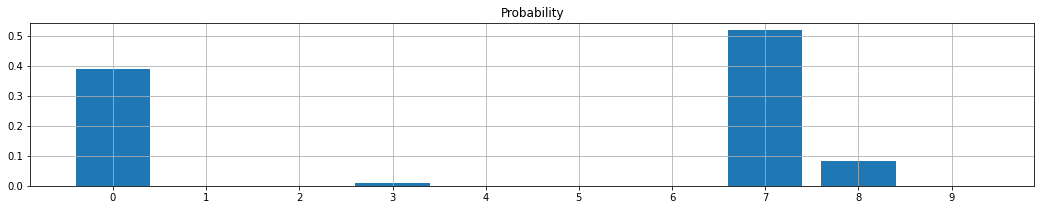

In [45]:
probability = gmm.predict_proba(X_scaled[train_df.index[train_df['Symbol']=='FOXA']])
plt.figure(figsize=[18, 3])
plt.title('Probability')
plt.bar(np.arange(0, len(probability[0])), probability[0])
plt.grid()
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
plt.show()

### Show component details

In [20]:
train_df[labels==1]

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
27,GOOGL,Alphabet Inc Class A,Information Technology,1007.71,31.48,0.000000,22.27,1198.00,824.3000,7.338240e+11,3.421700e+10,6.801692,4.70,http://www.sec.gov/cgi-bin/browse-edgar?action...
28,GOOG,Alphabet Inc Class C,Information Technology,1001.52,40.29,0.000000,22.27,1186.89,803.1903,7.285356e+11,3.271400e+10,6.772653,4.67,http://www.sec.gov/cgi-bin/browse-edgar?action...
51,AAPL,Apple Inc.,Information Technology,155.15,16.86,1.579541,9.20,180.10,131.1200,8.095080e+11,7.938600e+10,3.458609,5.66,http://www.sec.gov/cgi-bin/browse-edgar?action...
187,FB,"Facebook, Inc.",Information Technology,171.58,27.90,0.000000,5.39,195.32,132.4400,5.234230e+11,2.362400e+10,13.241967,7.08,http://www.sec.gov/cgi-bin/browse-edgar?action...
311,MSFT,Microsoft Corp.,Information Technology,85.01,25.76,1.874791,2.97,96.07,63.2200,6.899784e+11,4.107900e+10,7.113097,9.49,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [22]:
train_df[labels==2]

,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
7,ADBE,Adobe Systems Inc,Information Technology,185.16,52.31,0.000000,3.39,204.450,114.451,9.455021e+10,2.538040e+09,13.092818,11.06,http://www.sec.gov/cgi-bin/browse-edgar?action...
9,AMD,Advanced Micro Devices Inc,Information Technology,11.22,187.00,0.000000,0.03,15.650,9.700,1.119166e+10,3.390000e+08,2.109195,21.47,http://www.sec.gov/cgi-bin/browse-edgar?action...
64,BHGE,"Baker Hughes, a GE Company",Energy,27.50,305.56,2.499132,-0.31,57.730,28.030,3.299571e+10,2.850000e+08,1.939005,2.25,http://www.sec.gov/cgi-bin/browse-edgar?action...
103,CHTR,Charter Communications,Consumer Discretionary,348.65,162.92,0.000000,34.08,408.830,308.300,8.670888e+10,1.469400e+10,2.120863,2.27,http://www.sec.gov/cgi-bin/browse-edgar?action...
126,COP,ConocoPhillips,Energy,53.24,72.93,2.049254,-0.65,61.315,42.265,6.548246e+10,5.328000e+09,2.076418,2.16,http://www.sec.gov/cgi-bin/browse-edgar?action...
154,DWDP,DowDuPont,Materials,68.21,49.43,2.152975,1.59,77.080,64.010,1.652033e+11,5.250000e+09,2.692239,1.54,http://www.sec.gov/cgi-bin/browse-edgar?action...
171,EOG,EOG Resources,Energy,101.04,246.44,0.633390,-1.98,119.000,81.990,6.116403e+10,3.692749e+09,8.023020,4.55,http://www.sec.gov/cgi-bin/browse-edgar?action...
326,NFLX,Netflix Inc.,Information Technology,250.10,200.08,0.000000,1.25,286.810,138.260,1.148054e+11,8.090280e+08,9.861594,30.80,http://www.sec.gov/cgi-bin/browse-edgar?action...
344,NVDA,Nvidia Corporation,Information Technology,217.52,82.08,0.262238,2.57,249.270,95.170,1.386528e+11,3.098000e+09,20.094294,20.39,http://www.sec.gov/cgi-bin/browse-edgar?action...
346,OXY,Occidental Petroleum,Energy,68.47,195.63,4.408186,-0.75,78.090,57.200,5.346769e+10,5.205000e+09,6.044895,NaN,http://www.sec.gov/cgi-bin/browse-edgar?action...
